In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./train.csv', index_col="PassengerId")
# df_test = pd.read_csv('./test.csv')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
test = pd.read_csv('./test.csv', index_col="PassengerId")
# df_test = pd.read_csv('./test.csv')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


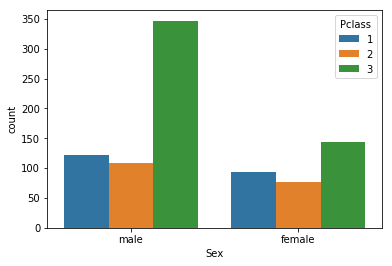

In [7]:
plt.figure(facecolor='w')
sns.countplot(data=train, x='Sex', hue='Pclass')

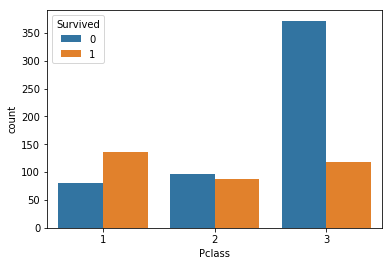

In [175]:
plt.figure(facecolor='w')
sns.countplot(data=train, x='Pclass', hue="Survived")

In [ ]:
sns.lmplot(data=train, x='Pclass', y='Fare', hue="Survived", fit_reg=False) 

In [ ]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)  

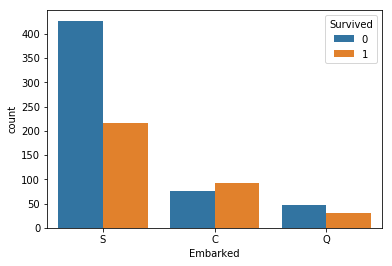

In [180]:
sns.countplot(data=train, x='Embarked', hue='Survived') 

In [ ]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)

train[["Sex", "Sex_encode"]].head()

In [ ]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

print(test.shape)

test[["Sex", "Sex_encode"]].head() 

In [58]:
df = pd.DataFrame([[1,2,3,4,5],[1,2,3,4,5]]) 

In [68]:
test.loc[test['Fare'].isnull(), "Fare_fillin"] = 0
train.loc[train['Fare'].isnull(), "Fare_fillin"] = 0


In [72]:
train.loc[train["Age"].isnull(), "Age_fillin"] = 30
test.loc[test["Age"].isnull(), "Age_fillin"] = 30


In [77]:
train['Embarked_C'] = train['Embarked'] == "C"
train['Embarked_S'] = train['Embarked'] == "S"
train['Embarked_Q'] = train['Embarked'] == "Q"


train[['Embarked', 'Embarked_C', 'Embarked_S', "Embarked_Q"]].head()

In [83]:
test['Embarked_C'] = test['Embarked'] == "C"
test['Embarked_S'] = test['Embarked'] == "S"
test['Embarked_Q'] = test['Embarked'] == "Q"


test[['Embarked', 'Embarked_C', 'Embarked_S', "Embarked_Q"]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [84]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [85]:
label_name = "Survived"
label_name

'Survived'

In [86]:
X_train = train[feature_names]
X_train.head()

,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0.0,7.2500,False,True,False
2,1,1.0,71.2833,True,False,False
3,3,1.0,7.9250,False,True,False
4,1,1.0,53.1000,False,True,False
5,3,0.0,8.0500,False,True,False


In [106]:
X_test = test[feature_names]
X_test.head()

,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0.0,7.8292,False,False,True
893,3,1.0,7.0000,False,True,False
894,2,0.0,9.6875,False,False,True
895,3,0.0,8.6625,False,True,False
896,3,1.0,12.2875,False,True,False


In [87]:
y_train = train[label_name]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [88]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier를 생성하는데, 트리의 최대 깊이(depth)를 5로 설정합니다.
# 이렇게 하면 트리의 가지(branch)가 5 depth 아래로 내려가지 않습니다.
# 또한 생성한 DecisionTreeClassifier를 model이라는 이름의 변수에 할당합니다.
model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
# DecisionTreeClassifier를 학습합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# graphviz 모듈을 가져옵니다.
import graphviz
# scikit-learn(줄여서 sklearn)의 tree 모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 가져옵니다.
from sklearn.tree import export_graphviz

# export_graphviz로 Decision Tree를 시각화합니다. 시각화 할 때는 다음의 옵션이 들어갑니다.
# 1) model. 시각화할 트리(Decision Tree) 입니다.
# 2) feature_names. 트리를 만들 때 사용한 feature들의 이름입니다.
# 3) class_names. 살았을 경우 시각화에서 어떻게 표현할 것인지(Survived), 반대로 죽었을 경우 시각화에서 어떻게 표현할 것인지(Perish)를 알려줍니다.
# 4) out_file. 시각화 겨롸를 저장할 파일명입니다. 이번에는 파일로 저장하지 않고 바로 쥬피터 노트북에 띄울 생각이므로 None을 주면 됩니다.
# 마지막으로 시각화한 결과를 dot_tree라는 이름의 변수에 저장합니다.
dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           class_names=["Perish", "Survived"],
                           out_file=None)

# graphviz에서 Source라는 기능을 통해 Decision Tree를 시각화합니다.
graphviz.Source(dot_tree)

In [107]:
# fit이 끝났으면, predict라는 기능을 사용하여 생존 여부(Survived)를 예측합니다.
# predict의 실행이 끝나면 test 데이터의 생존 여부(Survived)를 반환하며, 이를 predictions라는 이름의 변수에 할당합니다.
predictions = model.predict(X_test)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수에 값이 너무 많기 때문에, 상위 10개만 출력합니다.
predictions[0:10]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [108]:
# 캐글이 제공하는 제출 포멧(gender_submission.csv)을 읽어옵니다.
# PassengerId는 test 데이터와 동일하며, Survived는 남자일 경우 0, 여자는 1이 들어가 있습니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("D:/22222.csv", index_col="PassengerId")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [109]:
# 제출 포멧(submission)의 생존 여부(Survived) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 418개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["Survived"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [111]:
submission.to_csv('D:/tatan.csv')

In [ ]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("data/titanic/decision-tree_0.78947.csv")